<a href="https://colab.research.google.com/github/daniellaparada/PyE-TDS/blob/main/3_Trabajo_de_simulaci%C3%B3n_2_%5BRESUELTO%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo de simulación 2



## Simulación (ejercicio a entregar)

Armar una simulación basada en $N=100$ repeticiones que permita estimar el promedio de paquetes necesarios para conseguir llenar el álbum de figuritas del Mundial Qatar 2022. **[OPCIONAL]** Si es posible, representar el histograma de la cantidad de paquetes necesarios para completar el álbum a partir de la simulación. Puede usarse ``import seaborn as sns`` y ``sns.histplot()``.

A diferencia de la resolución a mano, aquí propondremos una versión más realista: el álbum del Mundial Qatar 2022 tiene ``figus_total=860`` y vamos a suponer que el paquete no trae una figurita, sino varias: ``figus_paquete=5``. Además, Panini, empresa creadora del álbum del Mundial Qatar 2022, asegura que NO vienen figuritas repetidas por paquete. Para resolver este problema, podés optar por simularlo de acuerdo con esto que asegura Panini, o no. Es tu elección.


**[PISTAS]** Para la construcción de la simulación, se sugiere la siguiente estructura, ya que no hemos estimado otra cosa que no sean probabilidades y, para este problema, necesitamos estimar una esperanza.

1.  Para el armado del bullet "1. Experimento aleatorio", definir la función ``cuantos_paquetes(figus_total, figus_paquete)`` que dado el tamaño del álbum (``figus_total``) y la cantidad de figuritas por paquete (``figus_paquete``) genere un álbum nuevo, simule su llenado y devuelva cuántos paquetes se debieron comprar para completarlo.
2.  Para el armado del bullet "2: Muestra aleatoria", definir una semilla, fijar ``N`` y armar ``N=100`` muestras de ``cuantos_paquetes(figus_total, figus_paquete)`` que se guarden en ``muestras``.
3.  En esta instancia, como vimos, estaríamos armando el bullet "3: Una función _filtro_ que caracteriza el evento E" para luego estimar $P(E)$ por la frecuencia relativa de su aparición en las $N$ muestras. Sin embargo, aquí no hay evento para estimar: lo que queremos estimar es una esperanza. Para hacerlo, la aproximaremos por su promedio muestral, es decir, por el promedio de lo observado en ``muestras``. Para ello, podés usar el comando ``np.mean(muestras)``. Esto nos dará una estimación del promedio de paquetes necesarios para completar un álbum del Mundial Qatar 2022 a partir de una simulación de $N$ replicaciones.

**[SUGERENCIA PARA EL BULLET 1]** Armar la función ``cuantos_paquetes(figus_total, figus_paquete)`` puede ser desafiante. Te compartimos una posible estructura que puede ayudarte a implementarla.

- Implementá una función ``crear_album(figus_total)`` para crear un vector ``album`` que tenga un total de ``figus_total`` ceros. Es decir, vamos a representar al álbum por un vector en el que cada posición representa el estado de una figurita con dos valores: 0, para indicar que aún no la conseguimos, y 1, para indicar que sí. El álbum se inicia con todas sus posiciones en 0, hasta que empezamos a comprar figuritas y pegarlas.

- Implementá una función ``comprar_paquete(figus_total,figus_paquete)`` que, dada la cantidad de figuritas por paquete (figus_paquete), genere un ``paquete`` (lista) de figuritas al azar. Si respetamos lo que afirma Panini de que no hay figuritas repetidas por paquete, usá el comando ``rd.sample``, ya que estaremos tomando una muestra de figuritas sin reposición.

- Implementá la función ``pegar_figus(album,paquete)`` que complete con un 1 las figuritas del álbum que te hayan tocado. Recordá que los vectores se indexan desde 0, entonces, te va a convenir que la posición ``[i]`` del ``album`` toma el valor 1 si alguno de los elementos de la lista ``figus`` contiene al valor ``i``. Pero, para eso, generá las figuritan en ``range(0,figus_total)``, es decir, figuritas que toman valores de 0 hasta ``figus_total-1``. Lo importante es que aquellas figuritas que no te hayan tocado conserven el 0 en la posición correspondiente del vector ``album``. En este problema, no abordamos la complejidad que significaría intercambian y considerar todas las repetidas que podés tener.

- Implementá la función ``album_incompleto(album)`` que recibe un vector ``album`` y devuelve ``True`` si el álbum ``A`` no está completo y ``False`` si lo está. Recordá que un álbum estará incompleto siempre que haya al menos un cero en alguna de sus posiciones.

- Por último, utilizá todas estas funciones para crear una única función que las invoque y que se llame ``cuantos_paquetes(figus_total, figus_paquete)`` que cuente la cantidad de paquetes necesarios hasta completar el álbum. Necesitarás usar la estructura de control ``while()``, pues comprarás paquetes mientras el álbum siga incompleto; y deberás generar un contador de ``paquetes_comprados`` que arranque en 0 y sume un 1 cada vez que compres un nuevo paquete.

## Simulación (resuelto)

Comencemos a trabajar con un álbum pequeño, así podemos probar las múltiples funciones que necesitaremos crear.

In [ ]:
import numpy as np
import random as rd

# Comencemos con un album pequeño
figus_total = 10
figus_paquete = 5
N = 100

Creamos el álbum usando la instrucción ``np.zeros(figus_total)`` para crear el vector de ceros que represente el álbum vacío.

In [ ]:
# Crear album
def crear_album(figus_total):
  album = np.zeros(figus_total)
  return(album)

crear_album(figus_total)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Creamos la función para comprar paquetes. Usamos ``rd.sample(range(0, figus_total), figus_paquete)`` para:

- representar lo que afirma Panini de que no vienen figuritas repetidas en un paquete,
- crear figuritas numeradas del 0 al ``figus_total`` para, luego, usar este índice para pegar las figuritas en el álbum.

In [ ]:
# Comprar paquete
def comprar_paquete(figus_total,figus_paquete):
  paquete = rd.sample(range(0, figus_total), figus_paquete)
  return(paquete)

comprar_paquete(figus_total,figus_paquete)

[8, 4, 5, 7, 2]

In [ ]:
# Probamos crear el album y comprar un paquete
# Pegamos las figuritas
album = crear_album(figus_total)
paquete = comprar_paquete(figus_total,figus_paquete)
album[paquete]=1
album

array([1., 1., 0., 0., 1., 1., 1., 0., 0., 0.])

Armamos la función para pegar las figuritas de un paquete en el álbum. Basta con asignar un 1 a todas las posiciones del álbum que coincidan con los números de figuritas del paquete. Esta es la ventaja de haber generado figuritas numeradas del del 0 al ``figus_total``.

In [ ]:
# Pegar figuritas en el paquete
def pegar_figus(album,paquete):
  album[paquete]=1
  return(album)

Estamos casi por terminar, basta crear una función que verifique si el álbum está completo. Una posible forma de hacerlo es sumar todos los ``True`` de la condición ``album>0``: esa cuenta nos daría la cantidad de números distintos de 0 que hay en el álbum, es decir, la cantidad de figuritas pegadas. Si esa suma es mayor o igual al total de figuritas (``len(album)``, por ejemplo), entonces quiere decir que ¡completamos el álbum!

In [ ]:
# Chequear si el álbum está completo
def album_incompleto(album):
  if (album>0).sum()>=len(album):
    return False
  else:
    return True

In [ ]:
# La probamos
album_incompleto(album)

True

Ahora sí, ¡a simular apertura de paquetes! Vamos a crear la función ``cuantos_paquetes(figus_total, figus_paquete)`` para:
- crear un álbum,
- guardar un contador de paquetes comprados,
- usar una estructura de control ``while()`` para que, mientras el álbum esté incompleto:
  - compremos un paquete,
  - aumentemos el contador de paquetes comprados, y
  - peguemos las figus del paquete en el álbum.

Cuando el álbum esté completo, queremos recuperar el contador de paquetes.

In [ ]:
def cuantos_paquetes(figus_total, figus_paquete):
  album = crear_album(figus_total)
  comprados = 0
  while(album_incompleto(album)):
    paquete = comprar_paquete(figus_total,figus_paquete)
    comprados = comprados + 1
    album = pegar_figus(album,paquete)
  return(comprados)

# La probamos
cuantos_paquetes(figus_total, figus_paquete)

4

¡Ya tenemos todo listo para simular! Pero, para evitar líos, sigamos trabajando con un álbum pequeño. Generemos las muestras de cantidad de paquetes comprados, ¡como si hubiéramos llenado muchos álbumes en la vida real!

In [ ]:
# Probamos con 100 repeticiones
rd.seed(123)
N = 1000
muestra = [cuantos_paquetes(figus_total, figus_paquete) for _ in range(N)]
muestra

[5,
 4,
 5,
 4,
 5,
 8,
 5,
 6,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 5,
 6,
 4,
 4,
 5,
 8,
 4,
 4,
 3,
 7,
 4,
 4,
 4,
 4,
 5,
 3,
 4,
 6,
 4,
 4,
 5,
 3,
 4,
 4,
 5,
 5,
 3,
 8,
 5,
 3,
 6,
 5,
 3,
 4,
 5,
 5,
 3,
 5,
 4,
 3,
 6,
 5,
 4,
 4,
 6,
 5,
 5,
 5,
 4,
 6,
 4,
 4,
 7,
 6,
 4,
 5,
 3,
 5,
 9,
 3,
 7,
 3,
 5,
 4,
 5,
 5,
 5,
 7,
 5,
 6,
 4,
 5,
 4,
 4,
 4,
 5,
 7,
 8,
 6,
 4,
 16,
 4,
 4,
 4,
 4]

Estimamos lo que buscamos calculando la cantidad promedio de paquetes que fueron necesarios en nuestra muestra.

In [ ]:
# Estimamos el promedio de paquetes
np.mean(muestra)

4.82

¡Ahora sí, lo hacemos con los datos que nos interesan!

In [ ]:
# Ahora, lo hacemos con los datos del mundial
rd.seed(123)
figus_total = 860
figus_paquete = 5
N = 100
muestra = [cuantos_paquetes(figus_total, figus_paquete) for _ in range(N)]
np.mean(muestra)

1256.48

¡Se necesitan MUUUUUUCHOS paquetes para lograr completar el álbum! Está claro que no es una buena estrategia completarlo sin cambiar las repetidas... Hacer un histograma de los datos de nuestra muestra, nos dará más información acerca de lo que ocurrió en la simulación: si bien el promedio es algo así como $1257$, ¡hubo corridas de la simulación en las que se necesitaron cerca de $2000$ paquetes! (Siempre hay alguien que tiene mucha mala suerte, ¿no? Y muchas veces creemos que somos nosotros, je.)

<Axes: ylabel='Count'>

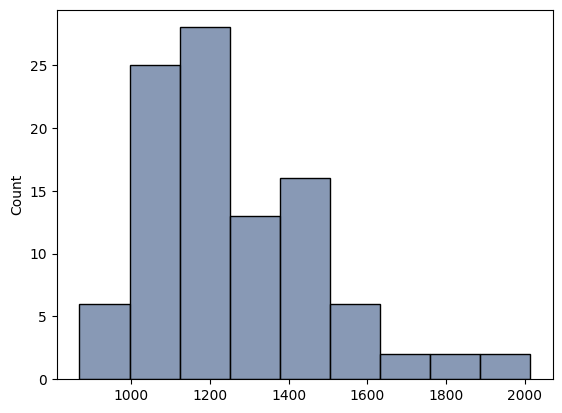

In [ ]:
import seaborn as sns
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

sns.histplot(muestra)

**[DISCLAIMER]** En la "resolución a mano" habíamos visto que una aproximación a la respuesta teórica rondaba los $1261$ paquetes. Con la simulación que hicimos acá, recuperamos un valor muy cercano a ese, pero valen las siguientes aclaraciones:

- La simulación siempre dará un resultado aproximado, ¡pero muchas veces, esa aproximación será muy buena! ¿Por qué? Es lo que estudiaremos en la última posta del bloque de probabilidades: veremos que al aumentar $N$ (la cantidad de veces que repetimos el experimento), la estimación dada por el promedio de la muestra, convergerá a la verdadera esperanza.

- El resultado aproximado que habíamos obtenido con la "resolución a mano" no es, exactamente, la esperanza que buscábamos, es decir, la esperanza del contexto más realista de todos. ¿Por qué? Porque nuestra "cuenta a mano" valía para paquetes de UNA figurita y no es del todo cierto que podamos dividir la esperanza (que sí obtuvimos de forma correcta al hacer las "cuentas" que dedujimos) por la cantidad de figuritas del paquete (5)... hay algunas cosas mínimas que deberíamos y eso hace que el resultado obtenido "a mano" no sea EXACTAMENTE el que estamos simulando acá. ¡Pero, no te preocupes, es CASI IDÉNTICO!

**¡Vale la pena modelar y simular!**